# Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loud dataset & preview

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahofy","key":"e4266934c354e47340cfe468e80fc061"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv "kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c ieee-fraud-detection

ieee-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ieee-fraud-detection.zip -d ieee_fraud_data
!ls ieee_fraud_data

Archive:  ieee-fraud-detection.zip
replace ieee_fraud_data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
sample_submission.csv test_transaction.csv  train_transaction.csv
test_identity.csv     train_identity.csv


In [ ]:
train_tra = pd.read_csv('ieee_fraud_data/train_transaction.csv')
train_id = pd.read_csv('ieee_fraud_data/train_identity.csv')

# EDA

In [ ]:
print('Train Transaction shape:', train_tra.shape)
print('Train Transaction columns ',list(train_tra.columns))

print('\n')

print('Train Identity shape:', train_id.shape)
print('Train Identity columns:',train_id.columns)

Train Transaction shape: (590540, 394)
Train Transaction columns  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',

In [ ]:
pd.set_option('display.max_columns', None) #set_option is used to show all columns
print(train_tra.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           Na

In [ ]:
# Check missing values
for i in train_tra.columns:
  print(i, train_tra[i].isnull().sum())
  print('\n')

TransactionID 0


isFraud 0


TransactionDT 0


TransactionAmt 0


ProductCD 0


card1 0


card2 8933


card3 1565


card4 1577


card5 4259


card6 1571


addr1 65706


addr2 65706


dist1 352271


dist2 552913


P_emaildomain 94456


R_emaildomain 453249


C1 0


C2 0


C3 0


C4 0


C5 0


C6 0


C7 0


C8 0


C9 0


C10 0


C11 0


C12 0


C13 0


C14 0


D1 1269


D2 280797


D3 262878


D4 168922


D5 309841


D6 517353


D7 551623


D8 515614


D9 515614


D10 76022


D11 279287


D12 525823


D13 528588


D14 528353


D15 89113


M1 271100


M2 271100


M3 271100


M4 281444


M5 350482


M6 169360


M7 346265


M8 346252


M9 346252


V1 279287


V2 279287


V3 279287


V4 279287


V5 279287


V6 279287


V7 279287


V8 279287


V9 279287


V10 279287


V11 279287


V12 76073


V13 76073


V14 76073


V15 76073


V16 76073


V17 76073


V18 76073


V19 76073


V20 76073


V21 76073


V22 76073


V23 76073


V24 76073


V25 76073


V26 76073


V27 76073


V28 76073


V29 76073


In [ ]:
# Check constant columns (same value for all the columns cells)
constant_cols_tra = [col for col in train_tra.columns if train_tra[col].nunique() <= 1]

constant_cols_id = [col for col in train_id.columns if train_id[col].nunique() <= 1]

print('Constant columns in transaction:', constant_cols_tra)
print('\nConstant columns in identity:', constant_cols_id)

Constant columns in transaction: []

Constant columns in identity: []


In [ ]:
# Merge transaction dataset with the identity dataset on TransactionID
df = pd.merge(train_tra, train_id, on='TransactionID', how='left')

In [ ]:
#after merging the 2 datasets
print(f'the dataset has {df.shape[0]} rows and {df.shape[1]} columns')

the dataset has 590540 rows and 434 columns


In [ ]:
# check missing values after merging
print('there is',df.isnull().any().sum(),'columns with missing values')

there is 414 columns with missing values


In [ ]:
# imblance check
df['isFraud'].value_counts()

,count
isFraud,
0,569877
1,20663


# Visualization

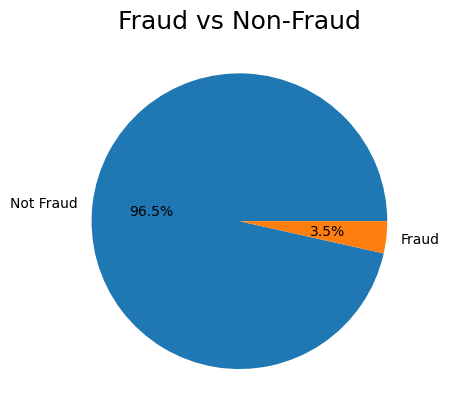

In [ ]:
# target varible visualization
plt.title('Fraud vs Non-Fraud', fontsize=18)
plt.pie(df.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.show()

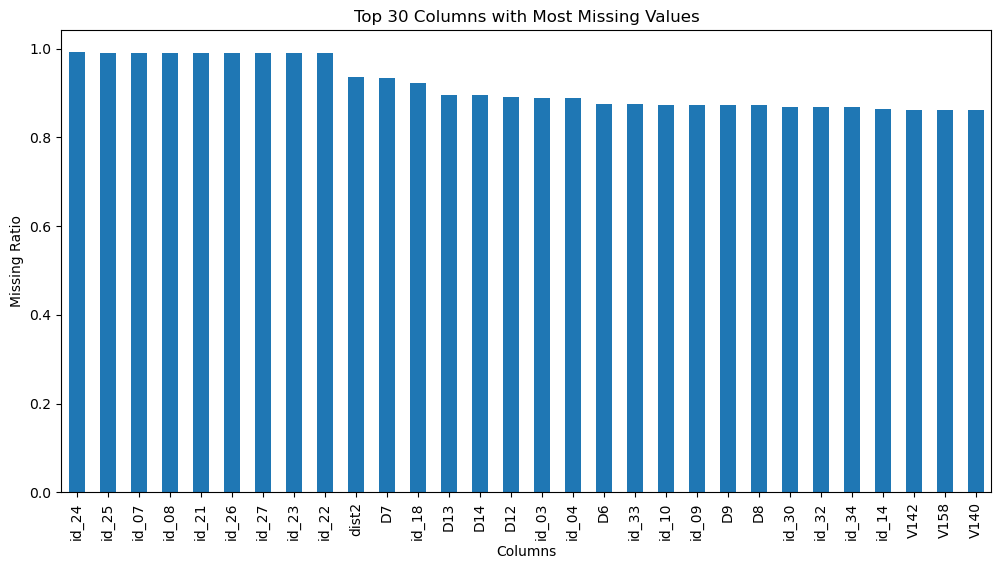

In [ ]:
# Missing values visualization
missing_values = df.isnull().mean().sort_values(ascending=False)
top30_missing = missing_values.head(30)

plt.figure(figsize=(12, 6))
top30_missing.plot(kind='bar')
plt.title('Top 30 Columns with Most Missing Values')
plt.ylabel('Missing Ratio')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Drop columns with more than 90% missing values
columnsDel = ['D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15','M8', 'M9']

null_threshold = 0.90 * len(train_tra)

#after searching we found out that even if the V or C columns had high ratio of
#missing values, they shouldn't be deleted, they are helpfull for froud detection
for col in df.columns:
    if col.startswith('V') or col.startswith('C'):
        continue

    if df[col].isnull().sum() >= null_threshold:
        columnsDel.append(col)

print('columns with >90% missing:',columnsDel)
df.drop(columns=columnsDel,inplace=True)

columns with >90% missing: ['D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M8', 'M9', 'dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [ ]:
print('New dataset shape: ',df.shape)

print('\nCoulmns after dropping: ', list (df.columns))

New dataset shape:  (590540, 415)

Coulmns after dropping:  ['transaction_id', 'is_fraud', 'transaction_time_delta', 'transaction_amount', 'product_type', 'card_user_id', 'card_bank_id', 'card_country_code', 'card_type', 'card_region', 'card_category', 'billing_region', 'billing_country', 'billing_to_shipping_distance', 'purchaser_email_domain', 'recipient_email_domain', 'count_feature_1', 'count_feature_2', 'count_feature_3', 'count_feature_4', 'count_feature_5', 'count_feature_6', 'count_feature_7', 'count_feature_8', 'count_feature_9', 'count_feature_10', 'count_feature_11', 'count_feature_12', 'count_feature_13', 'count_feature_14', 'time_delta_feature_1', 'time_delta_feature_2', 'time_delta_feature_3', 'time_delta_feature_4', 'time_delta_feature_5', 'match_flag_1', 'match_flag_2', 'match_flag_3', 'match_flag_4', 'match_flag_5', 'match_flag_6', 'match_flag_7', 'vesta_feature_1', 'vesta_feature_2', 'vesta_feature_3', 'vesta_feature_4', 'vesta_feature_5', 'vesta_feature_6', 'vesta_fe

In [ ]:
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 411, dtype: int64

In [ ]:
#sprate numric columns from catagorical
num_col = df.select_dtypes(include=['float64','int64']).columns
cat_col = df.select_dtypes(include='object').columns

print(cat_col)
print('\n\n',num_col)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'id_12', 'id_15', 'id_16', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37',
       'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


 Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'id_06', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_19',
       'id_20', 'id_32'],
      dtype='object', length=384)


In [ ]:
# Filling nulls with appropriate alternative for each column based on data types
df[cat_col] = df[cat_col].apply(lambda x: x.str.lower().str.strip())
df[cat_col] = df[cat_col].fillna('Unknown')

df[num_col]=df[num_col].fillna(-1)

print(f'Now the dataset has {df.isnull().sum().sum()} missing valuse')

Now the dataset has 0 missing valuse


In [ ]:
#After searching for meanings, we found out that the columns of
#froud detection datasets ususally have these meanings

rename_dict = {

    # Transaction fields
    "TransactionID": "transaction_id",
    "isFraud": "is_fraud",
    "TransactionDT": "transaction_time_delta",
    "TransactionAmt": "transaction_amount",
    "ProductCD": "product_type",

    # Card fields
    "card1": "card_user_id",
    "card2": "card_bank_id",
    "card3": "card_country_code",
    "card4": "card_type",
    "card5": "card_region",
    "card6": "card_category",

    # Address fields
    "addr1": "billing_region",
    "addr2": "billing_country",

    # Distance fields
    "dist1": "billing_to_shipping_distance",

    # Email fields
    "P_emaildomain": "purchaser_email_domain",
    "R_emaildomain": "recipient_email_domain",

    # Identity columns
    "id_01": "id_device_rating",
    "id_02": "id_device_count",
    "id_03": "id_device_frequency",
    "id_04": "id_device_time_since_prev",
    "id_05": "id_network_score",
    "id_06": "id_network_freq",
    "id_09": "id_behavior_freq",
    "id_10": "id_behavior_time",
    "id_11": "id_card_match_count",
    "id_12": "id_address_match",
    "id_13": "id_time_since_login",
    "id_14": "id_time_since_prev_txn",
    "id_15": "id_auth_method",
    "id_16": "id_device_proxy",
    "id_17": "id_local_network_flag",
    "id_19": "id_transaction_distance_1",
    "id_20": "id_transaction_distance_2",
    "id_28": "id_env_factor_2",
    "id_29": "id_card_usage_freq",
    "id_30": "id_account_age",
    "id_31": "id_card_age",
    "id_32": "id_previous_transactions_count",
    "id_33": "id_previous_fraud_count",
    "id_34": "id_device_stability",
    "id_35": "id_network_stability",
    "id_36": "id_risk_flag_1",
    "id_37": "id_risk_flag_2",
    "id_38": "id_risk_flag_3",
    "DeviceType": "device_type",
    "DeviceInfo": "device_info",
}


# C1–C14
for i in range(1, 15):
    rename_dict[f"C{i}"] = f"count_feature_{i}"

# D1–D15
for i in range(1, 6):
    rename_dict[f"D{i}"] = f"time_delta_feature_{i}"

# M1–M7
for i in range(1, 8):
    rename_dict[f"M{i}"] = f"match_flag_{i}"

# V1–V339
for i in range(1, 340):
    rename_dict[f"V{i}"] = f"vesta_feature_{i}"


df = df.rename(columns=rename_dict)
df.columns[:20]

Index(['transaction_id', 'is_fraud', 'transaction_time_delta',
       'transaction_amount', 'product_type', 'card_user_id', 'card_bank_id',
       'card_country_code', 'card_type', 'card_region', 'card_category',
       'billing_region', 'billing_country', 'billing_to_shipping_distance',
       'purchaser_email_domain', 'recipient_email_domain', 'count_feature_1',
       'count_feature_2', 'count_feature_3', 'count_feature_4'],
      dtype='object')

## Categorical features exploration

In [ ]:
columns_to_plot = ['product_type', 'card_type','device_type', 'match_flag_1', 'match_flag_2', 'match_flag_3',
       'match_flag_4', 'match_flag_5', 'match_flag_6', 'match_flag_7']

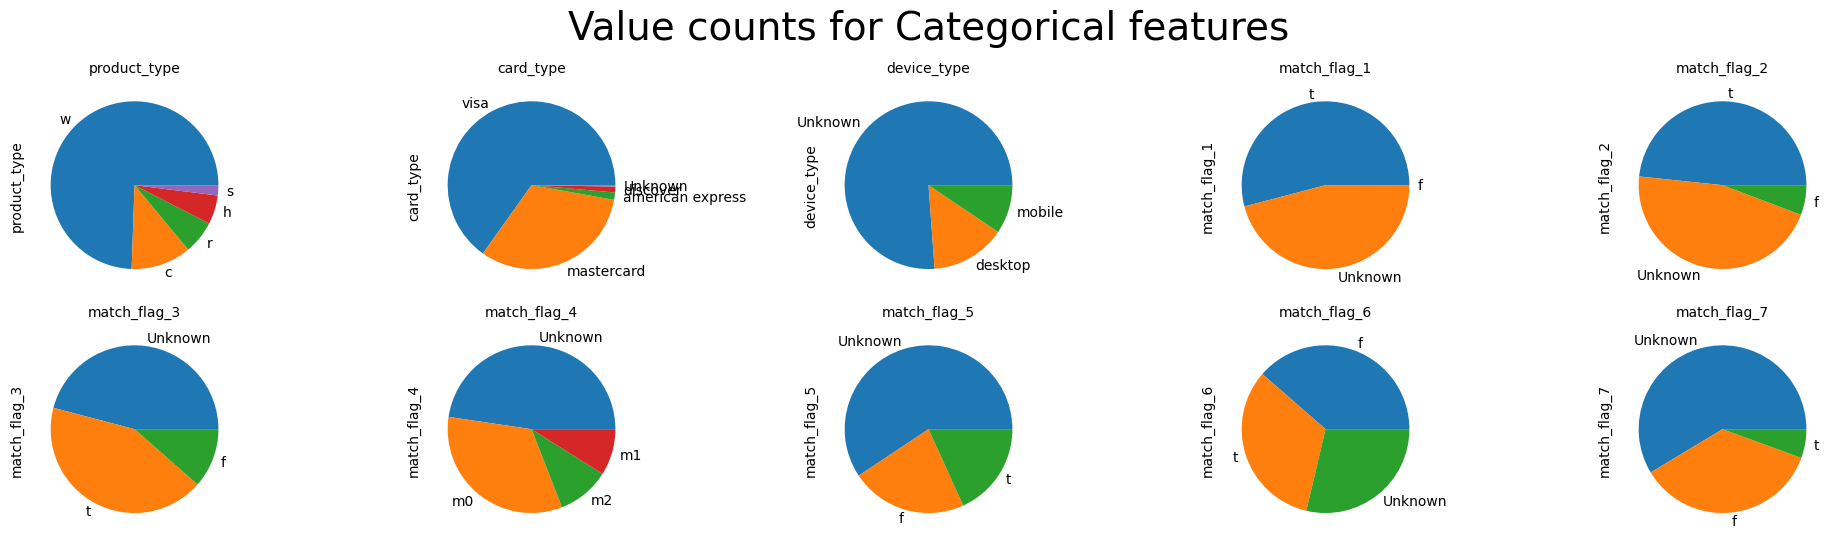

In [ ]:
#Value counts for Categorical features
plt.figure(figsize=(20, 8))
plt.suptitle('Value counts for Categorical features', fontsize=28)

for i, col in enumerate(columns_to_plot, 1):
    top_values = df[col].value_counts().head(10)

    plt.subplot(3, 5, i)
    top_values.plot(kind='pie')
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

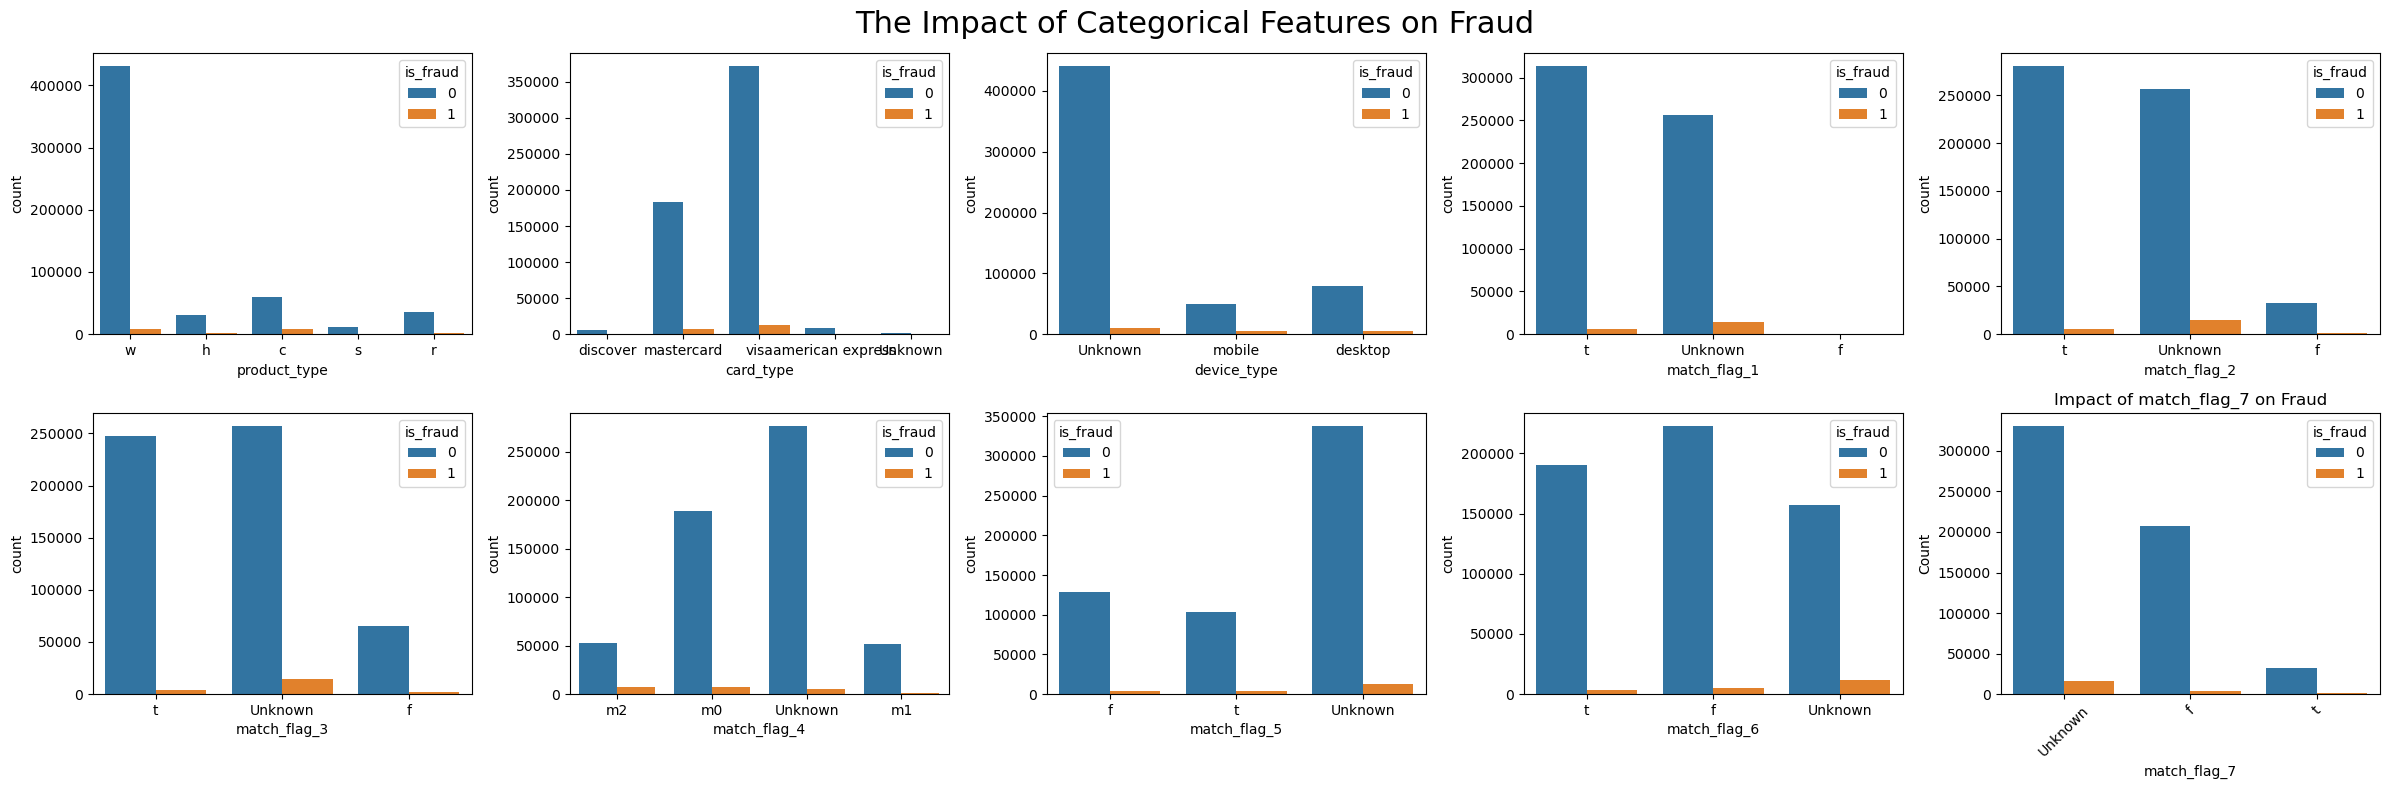

In [ ]:
# The Impact of Categorical Features on Fraud

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 8))
fig.suptitle('The Impact of Categorical Features on Fraud',
             fontsize=22)
axes = axes.flatten()


for i, col in enumerate(columns_to_plot):
    ax=axes[i]

    sns.countplot(data=df, x=col, hue='is_fraud',ax=ax)

    plt.title(f'Impact of {col} on Fraud')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Numerical features exploration¶


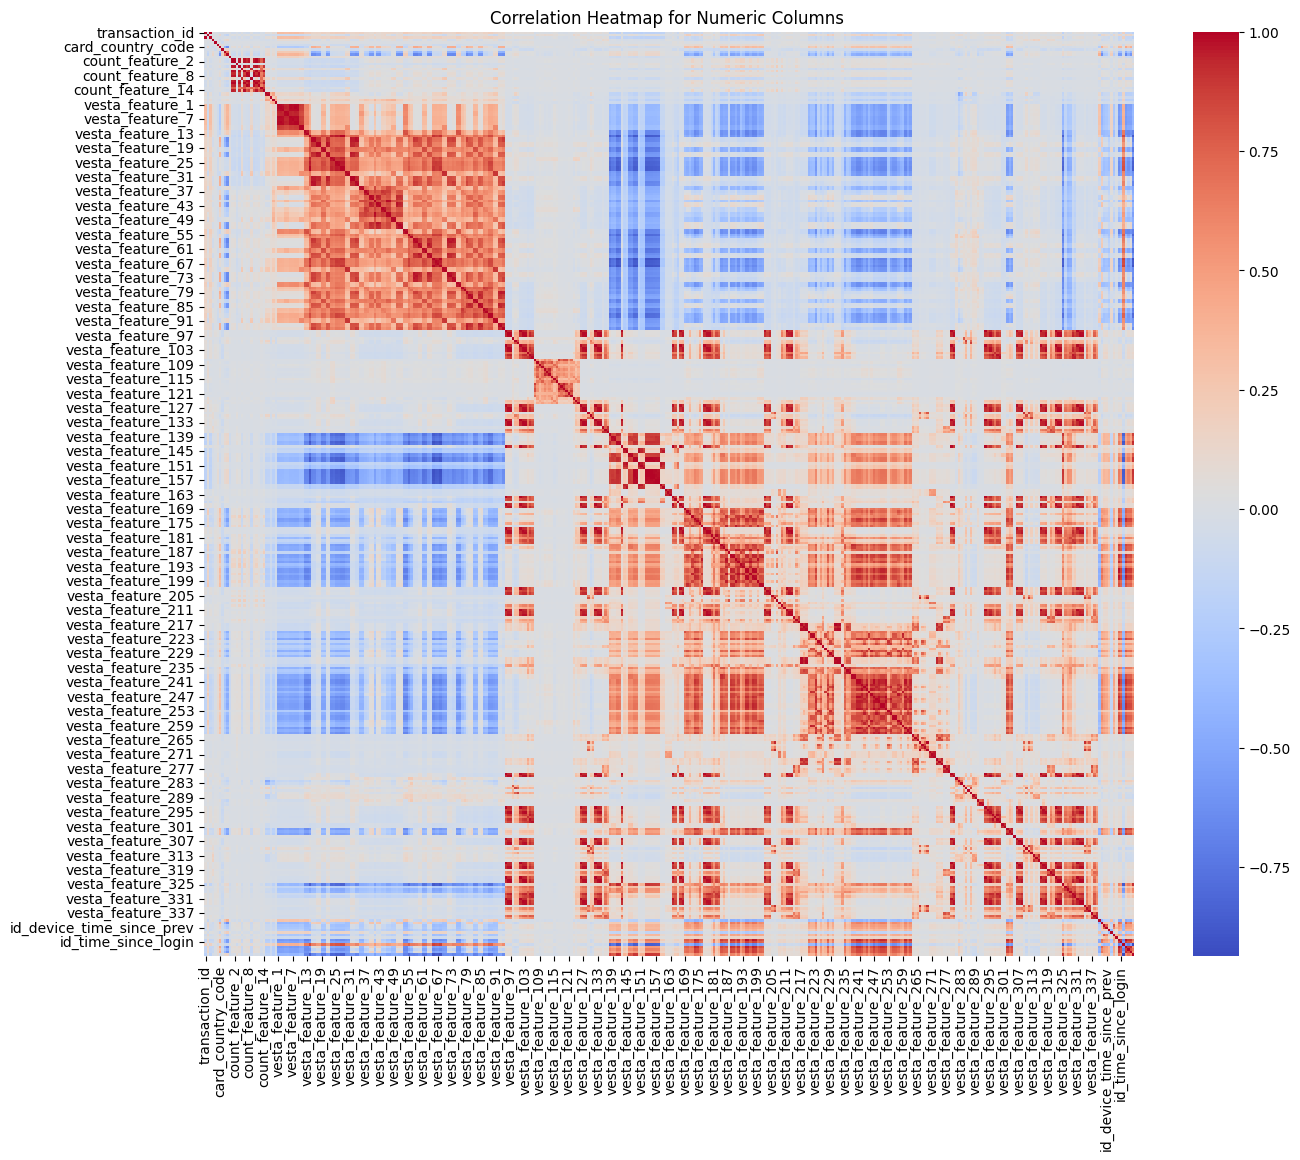

In [ ]:
# Compute the correlation matrix for all numric features
correlation_matrix = df[num_col].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

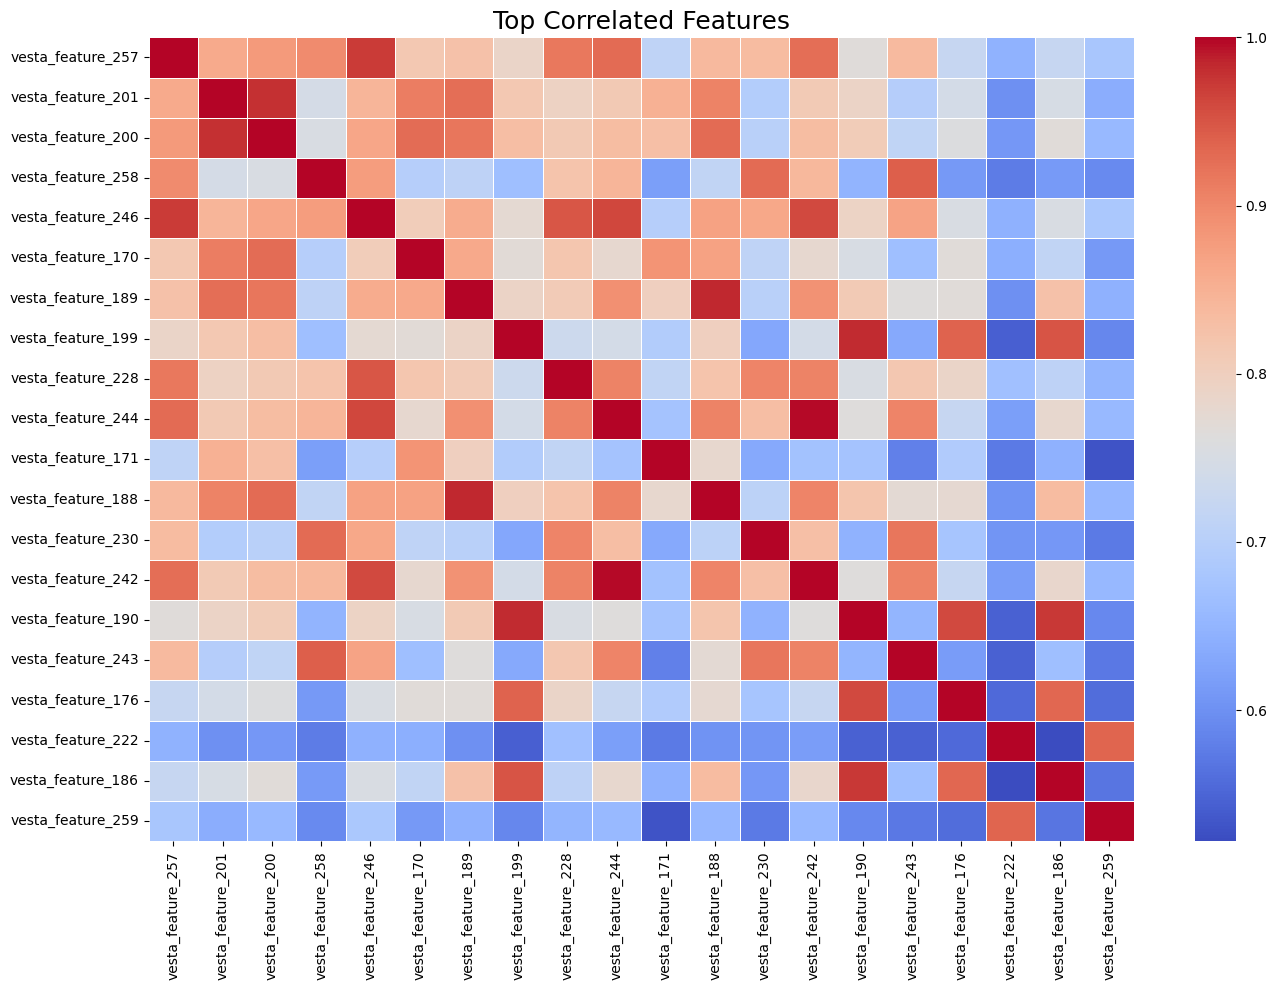

In [ ]:
# show top correlated featurs with fraud
numeric_features = num_col.drop('is_fraud')

corr = df[numeric_features].corrwith(df['is_fraud']).abs().sort_values(ascending=False)
top_features = corr.head(20).index.tolist()

plt.figure(figsize=(14, 10))
sns.heatmap(df[top_features].corr(),
            annot=False,
            cmap='coolwarm',
            linewidths=0.5)

plt.title('Top Correlated Features', fontsize=18)
plt.tight_layout()
plt.show()

The heatmap shows how the top ((fraud related)) features are correlated with each other which ones move together or in opposite directions, and helps identify feature groups, and possible relationships within the data



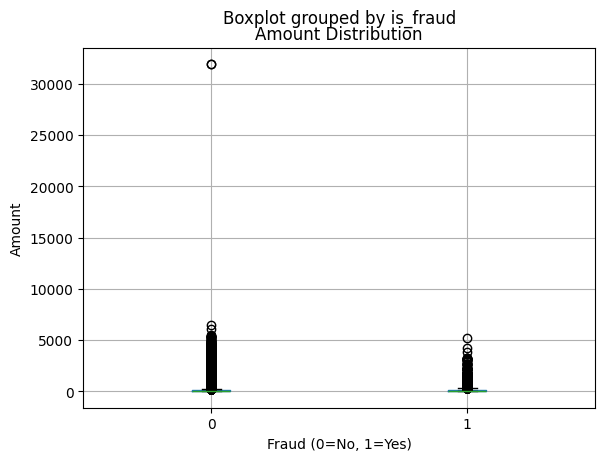

In [ ]:
#Show the relation between fraud and amount
df.boxplot(column='transaction_amount', by='is_fraud')
plt.title('Amount Distribution')
plt.xlabel('Fraud (0=No, 1=Yes)')
plt.ylabel('Amount')
plt.show()

distribution looks similar, meaning fraud transactions are not necessarily higher value than normal transactions.

In [ ]:
#Adding new columns to the dataset based on time

# days
df['transaction_day']=df['transaction_time_delta']/(60*60*24)
#hours
df['transaction_hour']=((df['transaction_time_delta']/60*60)%24).astype(int)
#weekday
df['transaction_weekday']=((df['transaction_time_delta']/(60*60*24))%7).astype(int)
#weekend
df['transaction_weekend']=(df['transaction_weekday']>=5).astype(int)

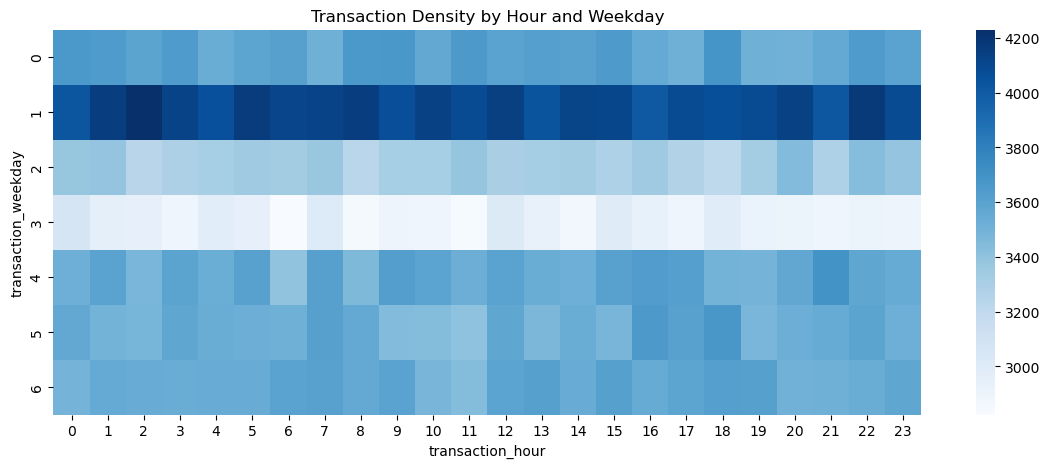

In [ ]:
#heatmap shows the correlation between transaction and weekdays
hour_day = df.pivot_table(index='transaction_weekday',
                          columns='transaction_hour',
                          values='transaction_id',
                          aggfunc='count')

plt.figure(figsize=(14,5))
sns.heatmap(hour_day, cmap='Blues')
plt.title('Transaction Density by Hour and Weekday')
plt.show()

The heatmap shows that weekday 1 has the most transactions, especially early in the morning and in the evening.
Weekday 3 has the fewest transactions, and the other days stay at a normal

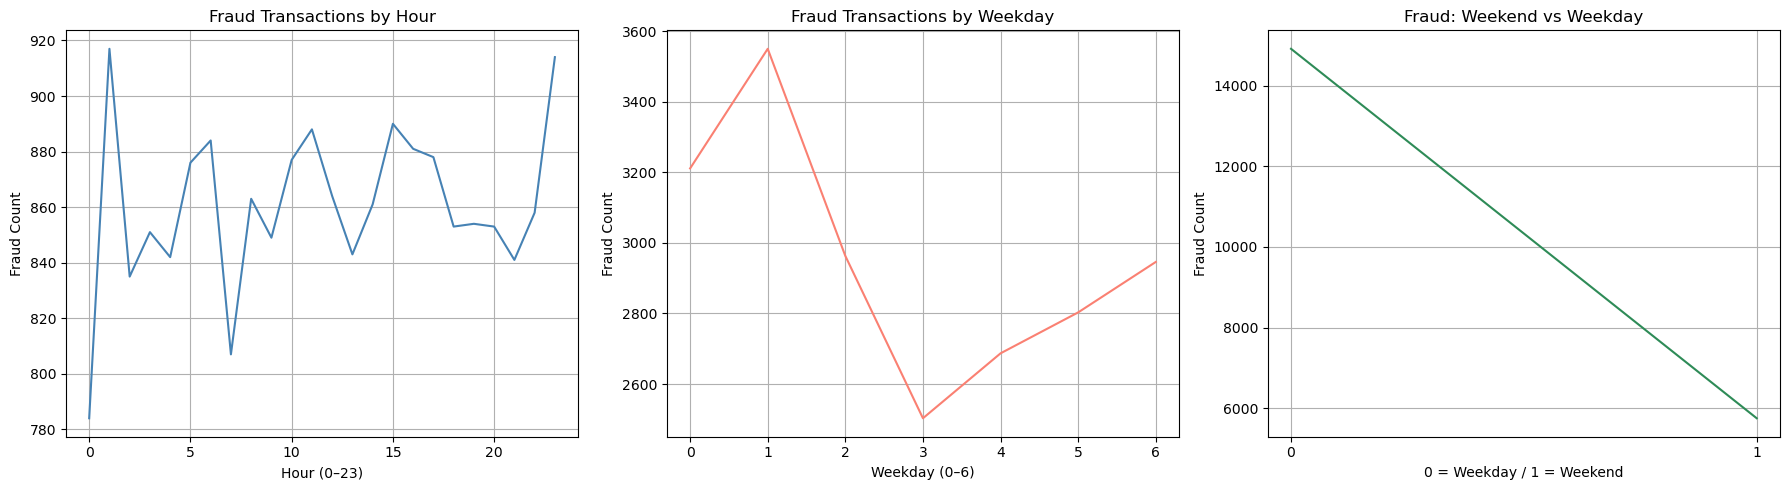

In [ ]:
#show fraud activites along with hour, weekday, weekend
fraud_df = df[df['is_fraud'] == 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hour
fraud_df['transaction_hour'].value_counts().sort_index().plot(
    kind='line', ax=axes[0], color='steelblue'
)
axes[0].set_title('Fraud Transactions by Hour')
axes[0].set_xlabel('Hour (0–23)')
axes[0].set_ylabel('Fraud Count')
axes[0].grid(True)

# Weekday
fraud_df['transaction_weekday'].value_counts().sort_index().plot(
    kind='line', ax=axes[1], color='salmon'
)
axes[1].set_title('Fraud Transactions by Weekday')
axes[1].set_xlabel('Weekday (0–6)')
axes[1].set_ylabel('Fraud Count')
axes[1].set_ylabel('Fraud Count')
axes[1].grid(True)

# Weekend vs Weekday
fraud_df['transaction_weekend'].value_counts().sort_index().plot(
    kind='line', ax=axes[2], color='seagreen'
)
axes[2].set_title('Fraud: Weekend vs Weekday')
axes[2].set_xlabel('0 = Weekday / 1 = Weekend')
axes[2].set_ylabel('Fraud Count')
axes[2].grid(True)
axes[2].set_xticks([0, 1])

plt.tight_layout()
plt.show()


Most fraud transactions are spread across hours and weekdays, with no strong time-based patterns.
Weekday activity is much higher than weekend activity.


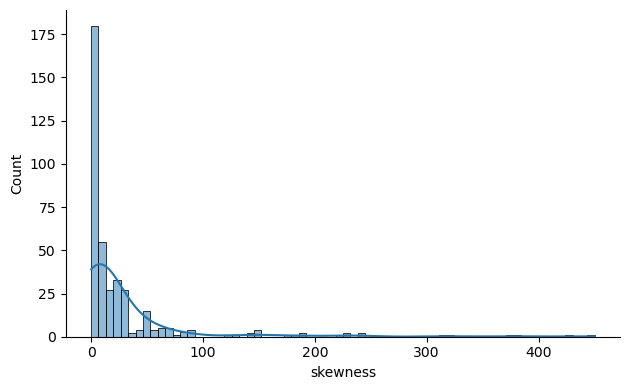

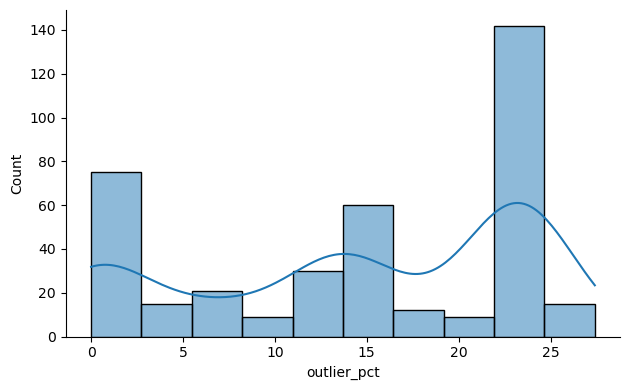

In [ ]:
# Skewness & Outlier
#update num_col after renaming columns
num_col = df.select_dtypes(include=['float64','int64']).columns

data = []

for col in num_col:
    col_data = df[col]

    skew_val = col_data.skew()

    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    outlier_pct = (len(outliers) / len(col_data)) * 100

    data.append({
        'feature': col,
        'skewness': skew_val,
        'outlier_pct': outlier_pct
    })

skewness_df = pd.DataFrame(data)

sns.displot(skewness_df['skewness'].abs(), kde=True, height=4, aspect=1.6)
sns.displot(skewness_df['outlier_pct'], kde=True, height=4, aspect=1.6)

skewness plot shows that most features are nearly symmetric, while a few are highly skewed.
outlier percentage plot indicates that many features contain a substantial proportion of outliers.

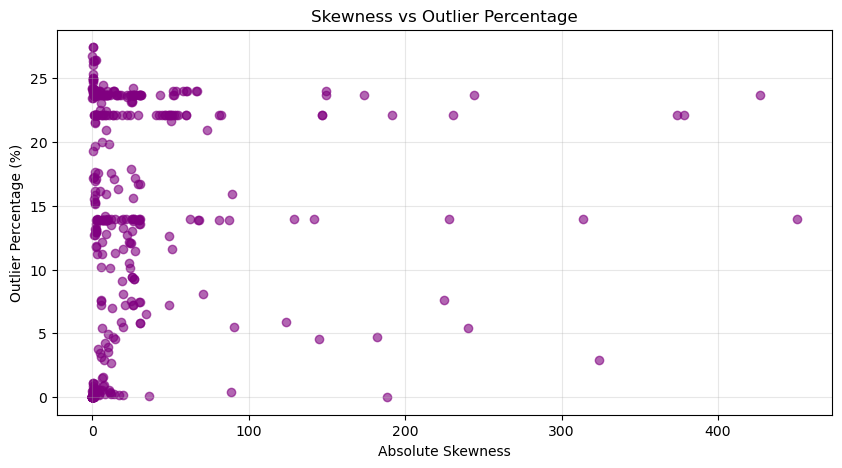

In [ ]:
# Skewness vs Outliers
plt.figure(figsize=(10,5))
plt.scatter(skewness_df['skewness'].abs(),
            skewness_df['outlier_pct'], alpha=0.6, color='purple')
plt.title("Skewness vs Outlier Percentage")
plt.xlabel("Absolute Skewness")
plt.ylabel("Outlier Percentage (%)")
plt.grid(alpha=0.3)
plt.show()

plot shows that as skewness increases, the number of outliers generally increases as well.

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#update cat)col after renaming columns
cat_col = df.select_dtypes(include='object').columns

df[cat_col].head(10)

,product_type,card_type,card_category,purchaser_email_domain,recipient_email_domain,match_flag_1,match_flag_2,match_flag_3,match_flag_4,match_flag_5,match_flag_6,match_flag_7,id_address_match,id_auth_method,id_device_proxy,id_env_factor_2,id_card_usage_freq,id_account_age,id_card_age,id_previous_fraud_count,id_device_stability,id_network_stability,id_risk_flag_1,id_risk_flag_2,id_risk_flag_3,device_type,device_info
0,w,discover,credit,Unknown,Unknown,t,t,t,m2,f,t,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,w,mastercard,credit,gmail.com,Unknown,Unknown,Unknown,Unknown,m0,t,t,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,w,visa,debit,outlook.com,Unknown,t,t,t,m0,f,f,f,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,w,mastercard,debit,yahoo.com,Unknown,Unknown,Unknown,Unknown,m0,t,f,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,h,mastercard,credit,gmail.com,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,notfound,new,notfound,new,notfound,android 7.0,samsung browser 6.2,2220x1080,match_status:2,t,f,t,t,mobile,samsung sm-g892a build/nrd90m
5,w,visa,debit,gmail.com,Unknown,t,t,t,m1,f,t,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
6,w,visa,debit,yahoo.com,Unknown,t,t,t,m0,f,f,t,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
7,w,visa,debit,mail.com,Unknown,Unknown,Unknown,Unknown,m0,f,f,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
8,h,visa,debit,anonymous.com,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,notfound,new,notfound,new,notfound,ios 11.1.2,mobile safari 11.0,1334x750,match_status:1,t,f,f,t,mobile,ios device
9,w,mastercard,debit,yahoo.com,Unknown,t,t,t,m0,t,t,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
ord_cols = [col for col in df.columns if 'match_flag' in col] + \
           [col for col in df.columns if 'id_risk_flag' in col] + \
           ['id_address_match']

for col in ord_cols:
    print(f'\nFeature: {col}')
    print(df[col].unique(), '\n')


Feature: match_flag_1
['t' 'Unknown' 'f'] 


Feature: match_flag_2
['t' 'Unknown' 'f'] 


Feature: match_flag_3
['t' 'Unknown' 'f'] 


Feature: match_flag_4
['m2' 'm0' 'Unknown' 'm1'] 


Feature: match_flag_5
['f' 't' 'Unknown'] 


Feature: match_flag_6
['t' 'f' 'Unknown'] 


Feature: match_flag_7
['Unknown' 'f' 't'] 


Feature: id_risk_flag_1
['Unknown' 'f' 't'] 


Feature: id_risk_flag_2
['Unknown' 't' 'f'] 


Feature: id_risk_flag_3
['Unknown' 't' 'f'] 


Feature: id_address_match
['Unknown' 'notfound' 'found'] 



In [ ]:
ordinal_mapping = {
    'Unknown': -1,
    'f': 0,
    'F': 0,
    't': 1,
    'T': 1,
    'm0': 0,
    'M0': 0,
    'm1': 1,
    'M1': 1,
    'm2': 2,
    'M2': 2,
    'notfound': 0,
    'found': 1,
}


for col in ord_cols:
    df[col] = df[col].map(ordinal_mapping)

In [ ]:
label_cols = [
    'id_auth_method', 'id_device_proxy', 'id_env_factor_2', 'id_card_usage_freq',
    'id_account_age', 'id_card_age','id_previous_fraud_count','id_device_stability',
    'id_network_stability', 'product_type', 'card_type', 'card_category','device_type'
]

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
os_cols = ['id_account_age', 'id_card_age', 'purchaser_email_domain', 'recipient_email_domain', 'device_info']
for col in os_cols:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)

In [ ]:
#the dataset after encoding has become all numric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 415 entries, transaction_id to transaction_weekend
dtypes: float64(381), int64(34)
memory usage: 1.8 GB


#### Correlation for catagorical features after encoding

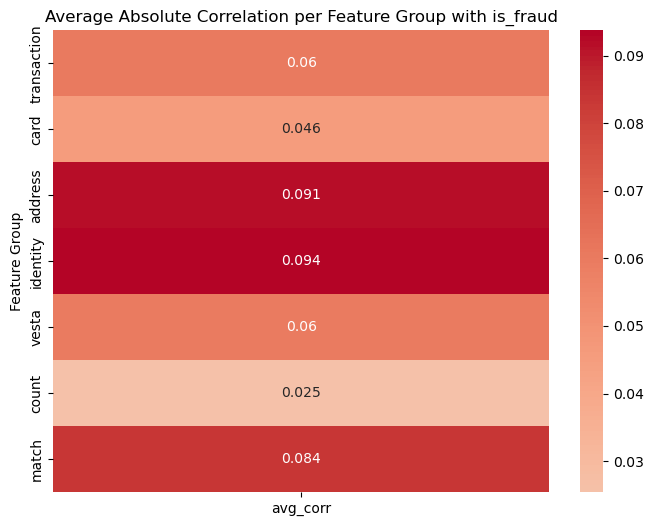

In [ ]:
#Average Absolute Correlation per Feature Group with is_fraud
groups = {
    'transaction': ['transaction_amount', 'transaction_time_delta', 'product_type'],
    'card': ['card_user_id','card_bank_id','card_country_code','card_type','card_region','card_category'],
    'address': ['billing_region','billing_country','billing_to_shipping_distance'],
    'identity': [col for col in df.columns if 'id_' in col],
    'vesta': [col for col in df.columns if 'vesta_feature' in col],
    'count': [col for col in df.columns if 'count_feature' in col],
    'match': [col for col in df.columns if 'match_flag' in col]
}

group_corr = {g: df[cols + ['is_fraud']].corr()['is_fraud'].abs().drop('is_fraud').mean()
              for g, cols in groups.items()}

group_corr_df = pd.DataFrame(group_corr, index=['avg_corr']).T

plt.figure(figsize=(8, 6))
sns.heatmap(group_corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Average Absolute Correlation per Feature Group with is_fraud')
plt.ylabel('Feature Group')
plt.show()

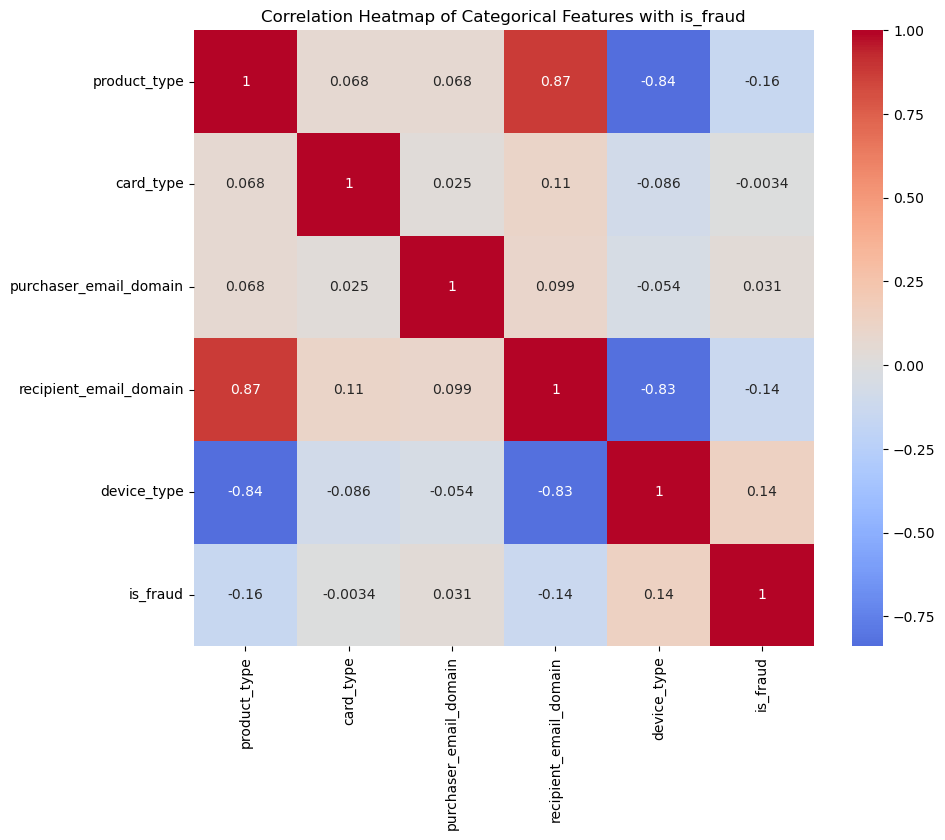

In [ ]:
#Correlation Heatmap of Categorical Features with is_fraud
cat_cols = [col for col in df.columns if 'product_type' in col
            or 'card_type' in col
            or 'device_type' in col
            or 'email_domain' in col]

cat_cols_with_target = cat_cols + ['is_fraud']

cat_corr_matrix = df[cat_cols_with_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Categorical Features with is_fraud')
plt.show()

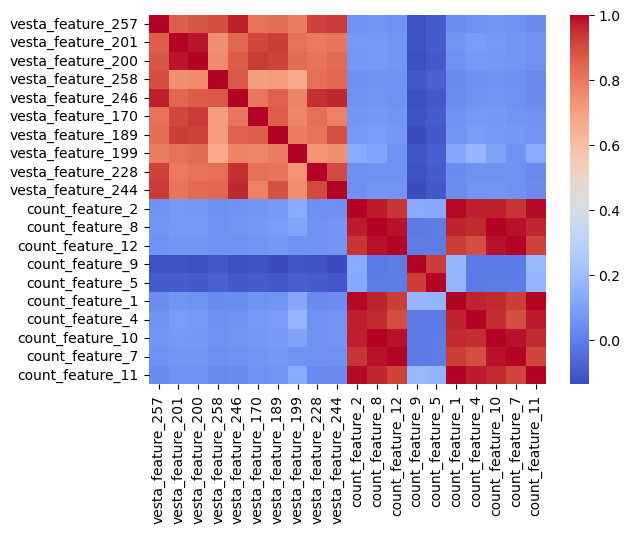

In [ ]:
#catagorical features Correlation with fraud
corr = df.corr()['is_fraud']

top_vesta = corr.filter(like='vesta_feature').abs().sort_values(ascending=False).head(10).index
top_count = corr.filter(like='count_feature').abs().sort_values(ascending=False).head(10).index

selected = list(top_vesta) + list(top_count)

corr_matrix = df[selected].corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()



---


## Premodeling


*  split
* standardScaler
*  handling imbalance
*  PCA








In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [ ]:
#split
y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
#Imbalance with SMOTE
print('Class distribtion before Balance: ', Counter(y_train))

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print('\nClass distribution AFTER Balance:', Counter(y_train_balanced))

Class distribtion before Balance:  Counter({0: 455902, 1: 16530})

Class distribution AFTER Balance: Counter({0: 455902, 1: 455902})


In [ ]:
#PCA With smote (balance)
print('Feature dimintion before PCA:', X.shape[1])

pca = PCA().fit(X_train_balanced)
explained_cumsum = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(explained_cumsum >= 0.95) + 1
print(f'Number of components to keep 95% variance with balane: {n_components_95}')

#PCA hyperparameter Tuning
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca  = pca.transform(X_test_scaled)

print('\nShape after PCA with balance (smote): ')
print('X_train_pca:', X_train_pca.shape)
print('X_test_pca :', X_test_pca.shape)

Feature dimintion before PCA: 414
Number of components to keep 95% variance with balane: 78

Shape after PCA with balance (smote): 
X_train_pca: (911804, 78)
X_test_pca : (118108, 78)


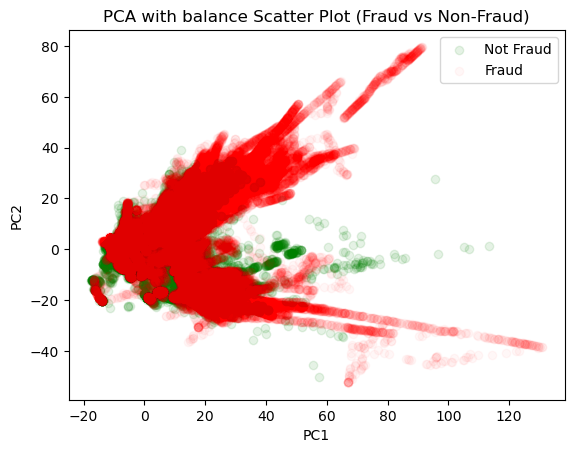

In [ ]:
#Data distribution after balancng and PCA
plt.scatter(
    X_train_pca[y_train_balanced == 0, 0],
    X_train_pca[y_train_balanced == 0, 1],
    c='green', alpha=0.1, label='Not Fraud'
)

plt.scatter(
    X_train_pca[y_train_balanced == 1, 0],
    X_train_pca[y_train_balanced == 1, 1],
    c='red', alpha=0.03, label='Fraud'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with balance Scatter Plot (Fraud vs Non-Fraud)')
plt.legend()
plt.show()

In [ ]:
#Recompute the PCA without balance
print('Feature dimintion before PCA:', X.shape[1])

pca_without_balance = PCA().fit(X_train_scaled)
explained_cumsum_wob = np.cumsum(pca_without_balance.explained_variance_ratio_)

n_components_wob = np.argmax(explained_cumsum_wob >= 0.95) + 1
print(f'Number of components to keep 95% variance without balance: {n_components_wob}')

#PCA hyperparameter Tuning
pca_without_balance = PCA(n_components=n_components_wob)
X_train_pca_wob = pca_without_balance.fit_transform(X_train_scaled)
X_test_pca_wob  = pca_without_balance.transform(X_test_scaled)


print('\nShape after PCA without balance: ')
print('X_train_pca:', X_train_pca_wob.shape)
print('X_test_pca :', X_test_pca_wob.shape)

Feature dimintion before PCA: 414
Number of components to keep 95% variance without balance: 77

Shape after PCA without balance: 
X_train_pca: (472432, 77)
X_test_pca : (118108, 77)


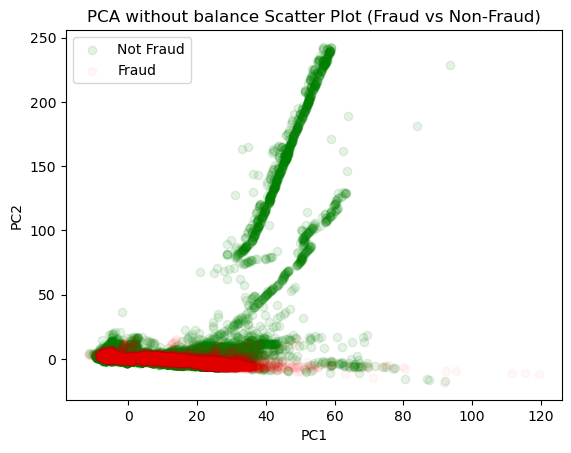

In [ ]:
#Data distribution after PCA without balancing
plt.scatter(
    X_train_pca_wob[y_train == 0, 0],
    X_train_pca_wob[y_train == 0, 1],
    c='green', alpha=0.1, label='Not Fraud'
)

plt.scatter(
    X_train_pca_wob[y_train == 1, 0],
    X_train_pca_wob[y_train == 1, 1],
    c='red', alpha=0.03, label='Fraud'
)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA without balance Scatter Plot (Fraud vs Non-Fraud)')
plt.legend()
plt.show()

# Modeling

## Supervised Models

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest

### Random Forest

In [ ]:
random_forest2 = RandomForestClassifier(
    n_estimators=600,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

random_forest2.fit(X_train_pca, y_train_balanced)

y_pred_RF = random_forest2.predict(X_test_pca)
y_prob_RF = random_forest2.predict_proba(X_test_pca)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print('F1 Score:', f1_score(y_test, y_pred_RF))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_RF))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.879779523825651
F1 Score: 0.2929136995169563
ROC-AUC: 0.8795870429517086

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.89      0.93    113975
           1       0.18      0.71      0.29      4133

    accuracy                           0.88    118108
   macro avg       0.59      0.80      0.61    118108
weighted avg       0.96      0.88      0.91    118108



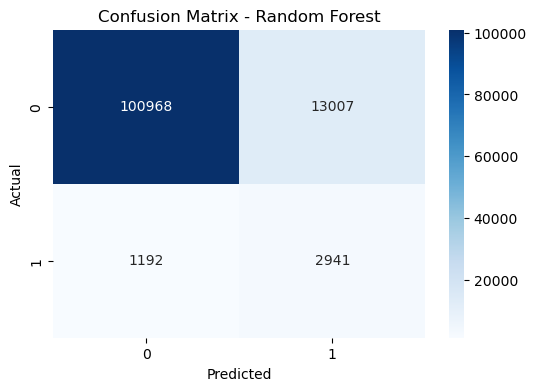

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost Model

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train_pca, y_train_balanced)

y_pred_XG = xgb.predict(X_test_pca)
y_proba_XG = xgb.predict_proba(X_test_pca)[:, 1]

print('Accuracy:', accuracy_score(y_test, y_pred_XG))
print('F1 Score:', f1_score(y_test, y_pred_XG))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_XG))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_XG))

Accuracy: 0.8724049175331053
F1 Score: 0.27811841348917415
ROC-AUC: 0.8752705509563113

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.17      0.70      0.28      4133

    accuracy                           0.87    118108
   macro avg       0.58      0.79      0.60    118108
weighted avg       0.96      0.87      0.91    118108



In [ ]:
counts = Counter(y_train)
neg = counts[0]
pos = counts[1]
scale_pos_weight = neg / pos

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

xgb.fit(X_train_pca_wob, y_train)

y_pred_xgb = xgb.predict(X_test_pca_wob)
y_proba_xgb = xgb.predict_proba(X_test_pca_wob)[:, 1]

#threshold coputing to find the best ratio
thresholds = np.linspace(0.05, 0.95, 20)

results = []
for thr in thresholds:
    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    prec = precision_score(y_test, y_pred_thr, zero_division=0)
    rec  = recall_score(y_test, y_pred_thr, zero_division=0)
    f1   = f1_score(y_test, y_pred_thr, zero_division=0)

    results.append({
        "threshold": thr,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

thr_df = pd.DataFrame(results)
thr_df_sorted = thr_df.sort_values(by="f1", ascending=False)
thr_df_sorted.head()

,threshold,precision,recall,f1
16,0.807895,0.585106,0.452456,0.510302
15,0.760526,0.494307,0.504234,0.499221
17,0.855263,0.686890,0.391725,0.498921
14,0.713158,0.412468,0.550690,0.471661
18,0.902632,0.795737,0.325188,0.461697


In [ ]:
best_thr = 0.76
y_pred_best_tr = (y_proba_xgb >= best_thr).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred_best_tr))
print('F1 Score:', f1_score(y_test, y_pred_best_tr))
print('ROC-AUC:', roc_auc_score(y_test, y_proba_xgb))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_best_tr))

Accuracy: 0.9645409286415823
F1 Score: 0.49916287969385315
ROC-AUC: 0.895556249972469

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113975
           1       0.49      0.50      0.50      4133

    accuracy                           0.96    118108
   macro avg       0.74      0.74      0.74    118108
weighted avg       0.96      0.96      0.96    118108



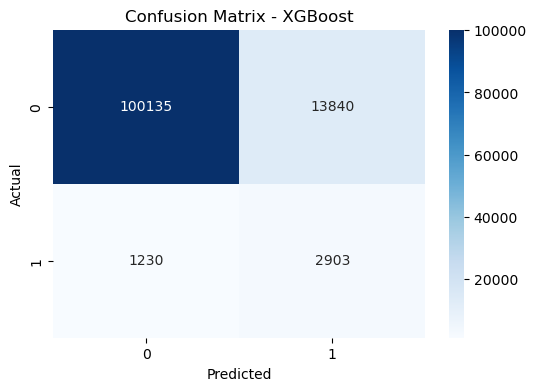

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_XG)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### LightGBM Model

In [ ]:
lgbm_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    )

lgbm_model.fit(X_train_pca, y_train_balanced)

y_pred_lgbm = lgbm_model.predict(X_test_pca)
y_prob_lgbm = lgbm_model.predict_proba(X_test_pca)[:, 1]


print('Accuracy:', accuracy_score(y_test, y_pred_lgbm))
print('F1 Score:', f1_score(y_test, y_pred_lgbm))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_lgbm))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 455902, number of negative: 455902
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19890
[LightGBM] [Info] Number of data points in the train set: 911804, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.902631489822874
F1 Score: 0.3361043759381134
ROC-AUC: 0.8924533573232676

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    113975
           1       0.22      0.70      0.34      4133

    accuracy                           0.90    118108
   macro avg       0.60      0.81      0.64    118108
weighted avg       0.96      0.90      0.93    118108



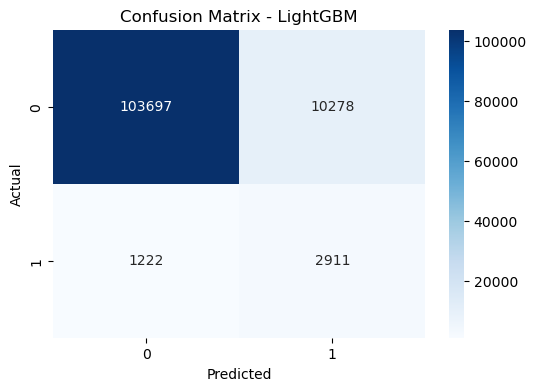

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Unsupervised Model

### Isolation Forest Model

In [ ]:
iso = IsolationForest(
    n_estimators=300,
    contamination='auto',
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)

iso.fit(X_train_balanced)

y_prob_iso = -iso.decision_function(X_test_scaled)

#threshold coputing to fine the best ratio
thresholds_iso = np.linspace(min(y_prob_iso), max(y_prob_iso), 200)

results_iso = []
for thr in thresholds_iso:
    y_pred_thr_iso = (y_prob_iso >= thr).astype(int)

    prec = precision_score(y_test, y_pred_thr_iso, zero_division=0)
    rec  = recall_score(y_test, y_pred_thr_iso, zero_division=0)
    f1   = f1_score(y_test, y_pred_thr_iso, zero_division=0)

    results_iso.append({
        "threshold": thr,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

thr_df_iso = pd.DataFrame(results_iso)
thr_df_sorted_iso = thr_df_iso.sort_values(by="f1", ascending=False)
thr_df_sorted_iso.head()

,threshold,precision,recall,f1
39,-0.088061,0.112561,0.379869,0.173663
35,-0.096581,0.107903,0.443020,0.173538
36,-0.094451,0.109103,0.423663,0.173521
37,-0.092321,0.110098,0.406000,0.173222
38,-0.090191,0.110859,0.390273,0.172670


In [ ]:
best_thr_iso = -0.096581
y_pred_best_tr_iso = (y_prob_iso >= best_thr_iso).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred_iso))
print('F1 Score:', f1_score(y_test, y_pred_iso))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_iso))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred_iso))

Accuracy: 0.8734971382124835
F1 Score: 0.17366296111940713
ROC-AUC: 0.7293127602415983

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.89      0.93    113975
           1       0.11      0.38      0.17      4133

    accuracy                           0.87    118108
   macro avg       0.54      0.64      0.55    118108
weighted avg       0.95      0.87      0.90    118108



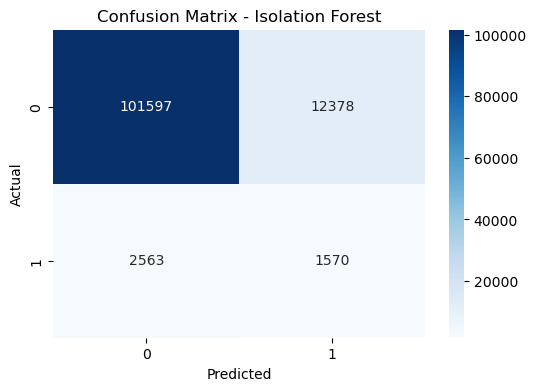

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_iso)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



---


# Group Names:
### Rahaf Sulaiman Almala 4452902
### Atheer musa alsubhi 4453758
### Haya abdullah almutlaq 4456389
### Ruba Fahad Alharbi 4453721
### Wasmiah Sulaiman Alharbi 4454488